# Overfitting

<img src="./images/dropout.png" alt="Dropout" style="width: 700px;"/>

If you look closely, our network still suffer from overfitting. Let's try some techniques to avoid overfitting.

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import mnist_reader
Labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

N = X_train.shape[0]
batch_size = 32

n_batch = int(N/batch_size)

from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)

Using TensorFlow backend.


Dropout is often used to fight overfitting. At each iteration, a given ratio of neurons are disabled at random.

A dropout layer is added at each dense layer.

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras.metrics as metrics

dropout_rate=0.1

model = Sequential()
model.add(Dense(units=200, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(units=150))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(units=50))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(units=30))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(units=10))
model.add(Activation('softmax'))

def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

# Change decay for better results

# lr: 1e-3, decay: 0

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001, decay=0., nesterov=False),
             metrics=[metrics.categorical_accuracy, top3_acc])

In [13]:
history = model.fit(X_train, y_train_ohe, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 7s - loss: 3.4222 - categorical_accuracy: 0.5846 - top3_acc: 0.8340     
Epoch 2/5
60000/60000 [==============================] - 7s - loss: 0.8583 - categorical_accuracy: 0.6987 - top3_acc: 0.9308     
Epoch 3/5
60000/60000 [==============================] - 7s - loss: 0.7523 - categorical_accuracy: 0.7304 - top3_acc: 0.9452     
Epoch 4/5
60000/60000 [==============================] - 7s - loss: 0.6937 - categorical_accuracy: 0.7490 - top3_acc: 0.9532     
Epoch 5/5
60000/60000 [==============================] - 7s - loss: 0.6521 - categorical_accuracy: 0.7565 - top3_acc: 0.9595     


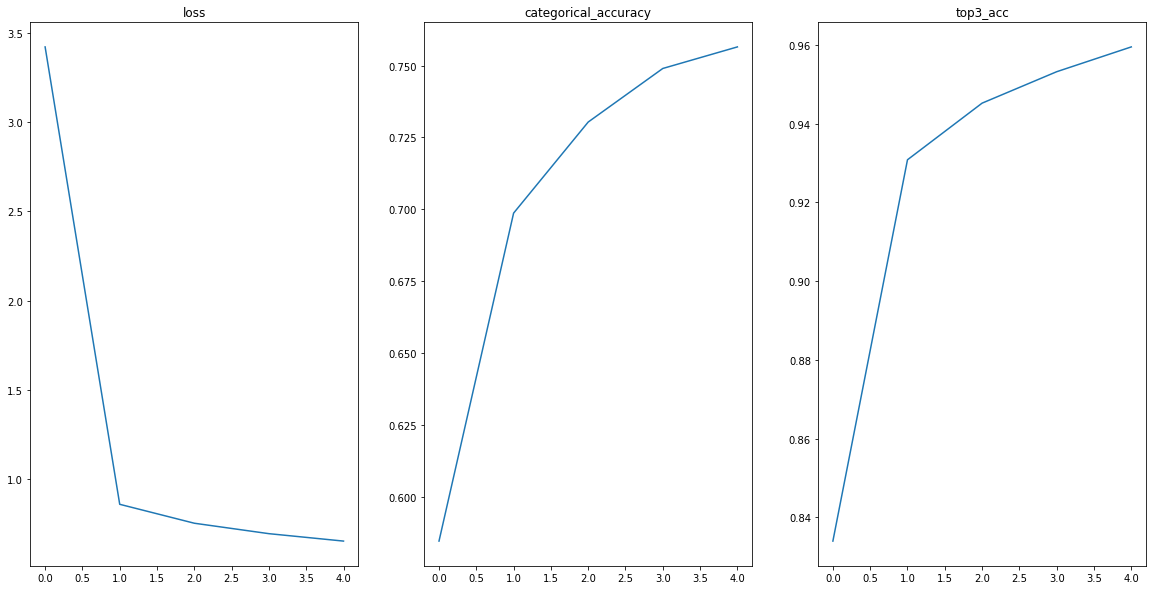

In [14]:
plt.figure(figsize=(20,10))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

predictions = model.predict(X_test).argmax(axis=1)

print("Accuracy: ")

print(accuracy_score(predictions, y_test))

print("\n\n")

print("Confusion matrix: ")

print(confusion_matrix(predictions, y_test))

print("\n\n")

print(classification_report(predictions, y_test, target_names=Labels))

Accuracy: 
0.7931



Confusion matrix: 
[[795   1  10  33   0   1 209   0   0   0]
 [  3 943   2   6   0   1   1   0   0   0]
 [ 19   1 651   8  89   0 181   0  20   0]
 [ 49  31  10 843  26   0  34   0   7   0]
 [ 12  12 271  63 861   0 383   0  12   0]
 [  1   0   0   1   0 878   0  19   4   4]
 [111   9  51  41  24   0 179   0  38   0]
 [  0   0   0   1   0  72   0 931   4  60]
 [ 10   2   5   4   0   7  13   0 915   1]
 [  0   1   0   0   0  41   0  50   0 935]]



             precision    recall  f1-score   support

T-shirt/top       0.80      0.76      0.78      1049
    Trouser       0.94      0.99      0.96       956
   Pullover       0.65      0.67      0.66       969
      Dress       0.84      0.84      0.84      1000
       Coat       0.86      0.53      0.66      1614
     Sandal       0.88      0.97      0.92       907
      Shirt       0.18      0.40      0.25       453
    Sneaker       0.93      0.87      0.90      1068
        Bag       0.92      0.96      0.94      

# Conclusion

* Find out how the dropout rate affects the training performance
* Find out how the dropout rate affects the testing performance
* Can you learn deeper and larger structures with dropout?

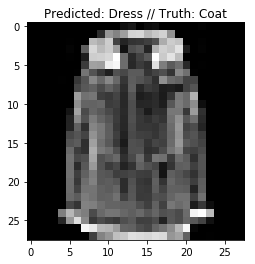

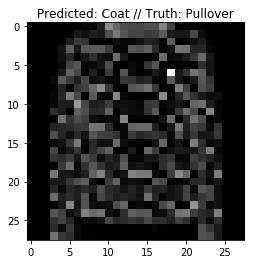

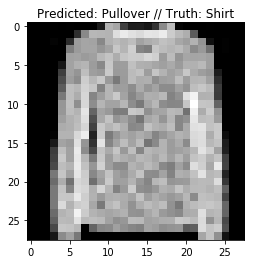

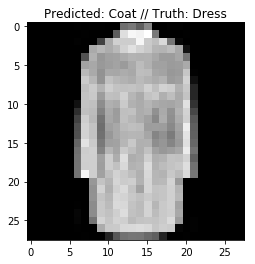

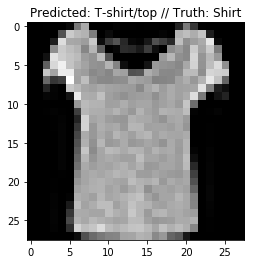

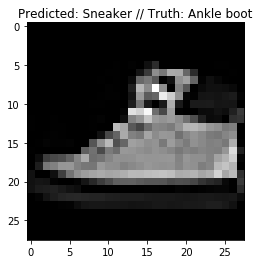

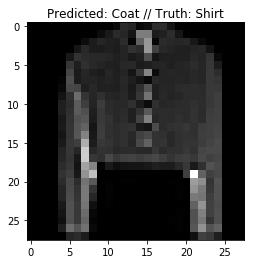

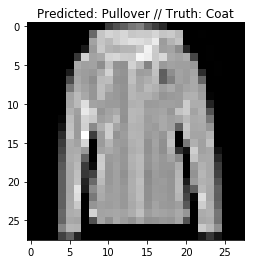

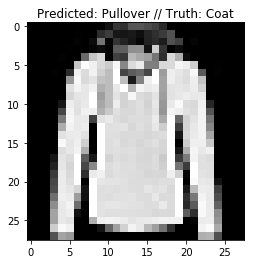

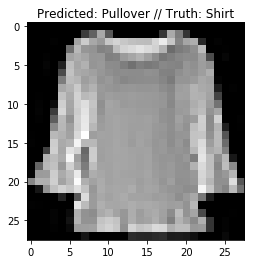

In [17]:
import random

wrong_predictions = (predictions != y_test)

n_wp = wrong_predictions.sum()

N = 10

for i in range(N):
    
    idx = random.choice(range(n_wp))
    plt.figure()
    plt.imshow(X_test[wrong_predictions,::][idx,::].reshape(28, 28), cmap="gray")
    
    
    plt.title("Predicted: {0} // Truth: {1}".format(
        Labels[predictions[wrong_predictions][idx]],
        Labels[y_test[wrong_predictions][idx]]
    ))

<img src="./images/go-deep.png" alt="Go deep" style="width: 700px;"/>